In [1]:
#Tabular Playground Series - Jun 2021
#Link Below
#https://www.kaggle.com/competitions/tabular-playground-series-jun-2021

import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
# Show versions of libraries
print(f'Versions - Scikit-Learn={sklearn.__version__}\t Pandas={pd.__version__}  \t Numpy={np.__version__}')
print(f'           Matplotlib={matplotlib.__version__}\t Seaborn={sns.__version__}')

Versions - Scikit-Learn=1.7.2	 Pandas=2.3.3  	 Numpy=2.2.6
           Matplotlib=3.10.7	 Seaborn=0.13.2


In [3]:
random_state = 42
np.random.seed(random_state) # this sets the random sequence. Setting only this the repeatability is guaranteed
                             # only if we re-execute the entire notebook
target = "target"

# load train and test and show the shapes
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.shape, df_test.shape

((200000, 77), (100000, 76))

In [4]:
# show 10 random records
df_train.sample(10)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [6]:
# number of unique values
df_train.nunique()

id            200000
feature_0         42
feature_1         37
feature_2         48
feature_3         59
               ...  
feature_71        31
feature_72        37
feature_73        91
feature_74        50
target             9
Length: 77, dtype: int64

In [7]:
# show target labels
classes = df_train[target].unique()
classes.sort()
classes

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 77 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  int64 
 1   feature_0   200000 non-null  int64 
 2   feature_1   200000 non-null  int64 
 3   feature_2   200000 non-null  int64 
 4   feature_3   200000 non-null  int64 
 5   feature_4   200000 non-null  int64 
 6   feature_5   200000 non-null  int64 
 7   feature_6   200000 non-null  int64 
 8   feature_7   200000 non-null  int64 
 9   feature_8   200000 non-null  int64 
 10  feature_9   200000 non-null  int64 
 11  feature_10  200000 non-null  int64 
 12  feature_11  200000 non-null  int64 
 13  feature_12  200000 non-null  int64 
 14  feature_13  200000 non-null  int64 
 15  feature_14  200000 non-null  int64 
 16  feature_15  200000 non-null  int64 
 17  feature_16  200000 non-null  int64 
 18  feature_17  200000 non-null  int64 
 19  feature_18  200000 non-

In [199]:
df_train.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,...,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,57735.171256,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,...,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,99999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,149999.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,199999.000000,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.00000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.00000,52.000000


In [8]:
# create X_full
X_full = df_train.drop(['id', target], axis=1)

In [201]:
# show X_full
X_full.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# create y
le = LabelEncoder()
y = le.fit_transform(df_train[target])
display(le.classes_)
display(np.unique(y, return_counts=True))


array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([ 9118, 24431, 14798,  4704,  3064, 51811, 14769, 51763, 25542]))

In [10]:
# during development use only a pair of usually fast models
model_lbls = ['dt' # decision tree
             #,'nb' # gaussian naive bayes
             ,'rf'   # random forest
             #,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-12,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state),
           'param': [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],
                    },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[20,30,40,50]
                     ,'learning_rate':[0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{
                      # 'max_depth': [*range(4,30)]
                      'max_depth': [*range(4,30,4)]
                    #  ,'n_estimators':[*range(20,80,5)]
                     ,'n_estimators':[*range(10,30,5)]
                     ,'class_weight': [None,'balanced']
                      }]
          }

}


[0.11669831 0.07591789 0.05308423 0.04570598 0.03864043 0.03184003
 0.03012308 0.02934325 0.02765308 0.02628103 0.02476721 0.02408011
 0.02304794 0.02192776 0.02063361 0.01896836 0.01795094 0.0171754
 0.01612948 0.01516765 0.01461421 0.01389225 0.01325595 0.0127744
 0.01232842 0.01184508 0.01162701 0.0112386  0.01072903 0.01029036
 0.00927199 0.00903617 0.00854496 0.00809131 0.00792701 0.00746077
 0.00720115 0.00693542 0.00688668 0.00686254 0.0067852  0.00669558
 0.00657856 0.00651044 0.00635624 0.00599466 0.00556866 0.00544044
 0.00524656 0.00504432 0.00483356 0.00411028 0.00381469 0.00372358
 0.00369381 0.00351625 0.00343449 0.00327978 0.00318041 0.00311074
 0.00272257 0.00270213 0.00238233 0.00218239 0.00211184 0.00206021
 0.00195977 0.0019241  0.00183644 0.00167358 0.00156027 0.00137893
 0.00124575 0.00088061 0.00051175]


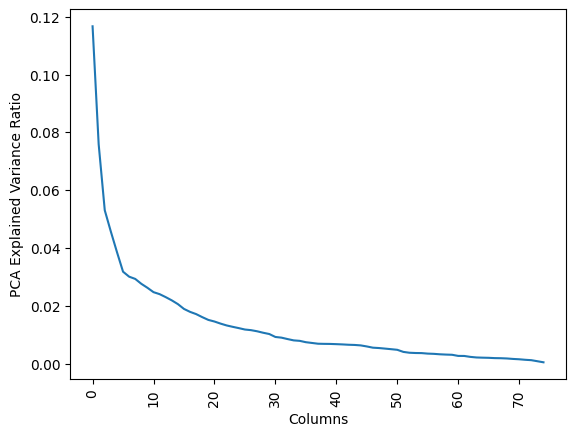

In [11]:
# Plot
pca = PCA()
X_trans = pca.fit_transform(X_full)
print(pca.explained_variance_ratio_)

plt.plot(range(X_full.shape[1]), pca.explained_variance_ratio_);

plt.xlabel('Columns')
plt.xticks(rotation = 90)
plt.ylabel('PCA Explained Variance Ratio')

plt.show()

In [14]:
pca_threshold = 0.9
pca_variances = pca.explained_variance_ratio_

# Sort the explained variance ratios in descending order
# ... sono già ordinate ma con: sorted(pca_variances, reverse=true) ordini qualsiasi lista
# pca_variances == sorted(pca_variances, reverse=True)

# Calculate the cumulative sum of the explained variance ratios
cum_variances = np.cumsum(pca_variances)
display(cum_variances) # è un array

# Find the index i of the first principal component where the cumulative sum exceeds 0.05
display(cum_variances>pca_threshold)
cutoff_index = np.argmax(cum_variances > pca_threshold)
print(f"considerando {cutoff_index} principal component, mantengo il {cum_variances[cutoff_index]*100:.2f}% della varianza")


# Keep the first i principal components and discard the rest
X = X_trans[:, :cutoff_index].copy() # Attenzione! Fare slicing in python copia i riferimenti e quindi le modifiche sono visibili anche sull'array originale. Fai copie
# pca_X[0, 0] = 2.5 
display(X)
display(X_trans)

array([0.11669831, 0.19261621, 0.24570044, 0.29140642, 0.33004684,
       0.36188688, 0.39200995, 0.4213532 , 0.44900628, 0.47528731,
       0.50005452, 0.52413464, 0.54718258, 0.56911034, 0.58974395,
       0.6087123 , 0.62666324, 0.64383864, 0.65996811, 0.67513577,
       0.68974997, 0.70364223, 0.71689817, 0.72967257, 0.742001  ,
       0.75384608, 0.76547309, 0.77671169, 0.78744072, 0.79773108,
       0.80700307, 0.81603924, 0.8245842 , 0.83267551, 0.84060253,
       0.84806329, 0.85526444, 0.86219986, 0.86908654, 0.87594907,
       0.88273427, 0.88942985, 0.89600841, 0.90251885, 0.90887508,
       0.91486974, 0.9204384 , 0.92587884, 0.93112541, 0.93616972,
       0.94100328, 0.94511356, 0.94892826, 0.95265184, 0.95634565,
       0.95986189, 0.96329639, 0.96657616, 0.96975658, 0.97286732,
       0.97558989, 0.97829202, 0.98067436, 0.98285675, 0.98496859,
       0.98702879, 0.98898856, 0.99091266, 0.9927491 , 0.99442268,
       0.99598296, 0.99736188, 0.99860763, 0.99948825, 1.     

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

considerando 43 principal component, mantengo il 90.25% della varianza


array([[-9.32643548e+00,  1.40465104e+00, -2.61610037e+00, ...,
         1.60920085e+00,  4.80123109e+00,  6.06910767e-01],
       [-1.34487677e+01,  2.85156524e+00, -2.28921258e+00, ...,
        -7.13066479e-01, -3.49813030e-01, -4.10885394e-02],
       [-7.38647510e+00,  4.85378179e+00, -2.18886032e+00, ...,
        -1.78167901e+00, -1.71401719e+00, -4.20278000e-01],
       ...,
       [ 3.12719731e+01, -3.28702588e+01,  6.80983063e+01, ...,
         3.86228262e-01,  2.35983068e+00,  1.21927862e+00],
       [-1.17794475e+01,  3.00202905e+00, -2.36336457e+00, ...,
         1.36629464e+00,  1.24995259e+00,  1.09243878e+00],
       [ 1.90893703e+01, -8.29669061e+00, -1.03535639e+01, ...,
         6.03495949e-01,  5.47162175e+00, -5.37185755e-01]],
      shape=(200000, 43))

array([[ -9.32643548,   1.40465104,  -2.61610037, ...,  -0.66230588,
         -0.40112784,   2.67406371],
       [-13.44876772,   2.85156524,  -2.28921258, ...,  -0.34959482,
         -0.17311745,  -0.20592007],
       [ -7.3864751 ,   4.85378179,  -2.18886032, ...,  -0.33561013,
         -0.46046934,  -0.20990131],
       ...,
       [ 31.27197312, -32.87025878,  68.09830633, ...,  12.78726958,
          4.86548345,  -0.78059136],
       [-11.77944748,   3.00202905,  -2.36336457, ...,   0.75673158,
         -0.26996736,  -0.23816546],
       [ 19.08937027,  -8.29669061, -10.35356393, ...,  -0.65279091,
         -0.84628873,  -0.45649798]], shape=(200000, 75))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.01, random_state=random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000, 43), (198000, 43), (2000,), (198000,))

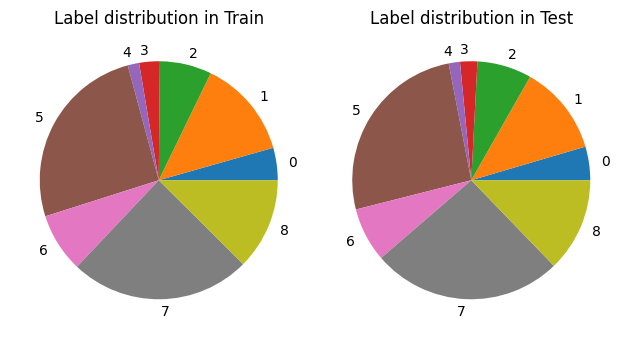

In [22]:
# show frequencies of target labels in train and test to see if they are similar (sanity check)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0]);
ax1.set_title("Label distribution in Train")
ax2.pie(np.unique(y_test, return_counts=True)[1], labels=np.unique(y_test, return_counts=True)[0]);
ax2.set_title("Label distribution in Test")

plt.tight_layout()
plt.show()

In [26]:
scorings = ['accuracy'
            # ,'precision_macro'
            # ,'recall_macro'
            ,'f1_macro'
            ]

In [27]:
from sklearn.model_selection import ParameterGrid


In [28]:
clfs = []
results = pd.DataFrame(columns=['scoring','model','best_params','accuracy','precision_macro','recall_macro','f1_macro'])

In [29]:
#grid search cv
cv = 5

for scoring in scorings:
    for m in model_lbls:
        clf = GridSearchCV(
            models[m]['estimator'],
            models[m]['param'],
            cv=cv,
            scoring = scoring,
        )
        clf.fit(X_train, y_train)
        clfs.append(clf)
        y_true, y_pred = y_test, clf.predict(X_test)
        # y_preds.append(y_pred)
        cr = classification_report(
                y_true,
                y_pred,
                output_dict=True,
                zero_division=1
        )
        results.loc[len(results)] = [
            scoring,models[m]['name'],
            clf.best_params_
            # ,(clf.cv_results_['mean_fit_time'].sum()+clf.cv_results_['mean_score_time'].sum())*n_splits
            ,cr['accuracy']
            ,cr['macro avg']['precision']
            ,cr['macro avg']['recall']
            ,cr['macro avg']['f1-score']
        ]


In [31]:
# show results
results

,scoring,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
0,accuracy,Decision Tree,"{'class_weight': None, 'max_depth': 4}",0.293379,0.669495,0.152254,0.125706
1,accuracy,Random forest,"{'class_weight': None, 'max_depth': 4, 'n_esti...",0.326707,0.675826,0.162668,0.129561
2,f1_macro,Decision Tree,"{'class_weight': 'balanced', 'max_depth': 9}",0.162096,0.134384,0.135293,0.119100
3,f1_macro,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, '...",0.267980,0.156130,0.164498,0.156754


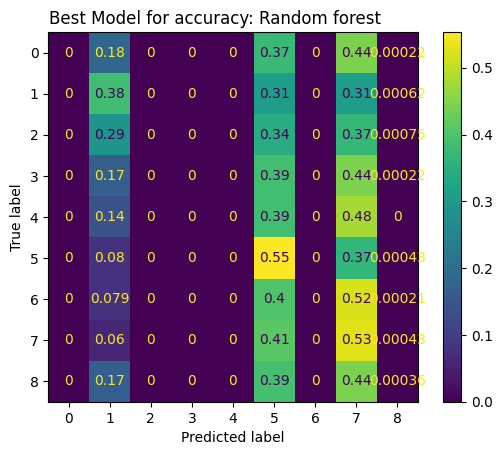

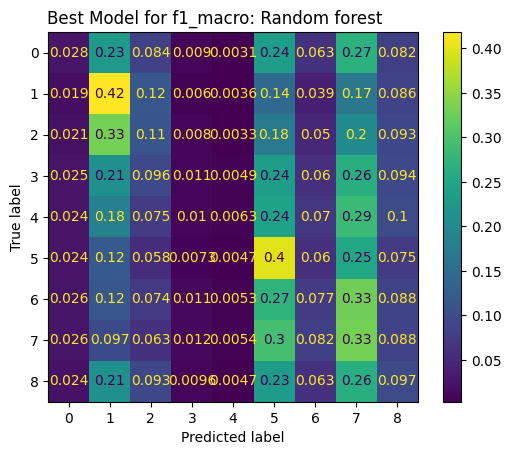

In [32]:
# scoring_filter = "accuracy"
# display(results.scoring==scoring_filter)
# # loc[] mi permette di indicizzare sia per righe che per colonne
# # qua sto selezionando le righe che rispettano relative allo metrica di score che voglio considerare
# # la colonna cone le misure per quella metrica
# best_row = results.loc[results.scoring==scoring_filter, scoring_filter]  
# best_row.idxmax(axis=0) # oppure .argmax(), è uguale

for score in scorings:
    scoring_filter = score
    # per la misura corrente recupero il modello migliore e lo mostro
    best_row = results.loc[results.scoring==scoring_filter, scoring_filter].idxmax(axis=0)
    disp = ConfusionMatrixDisplay.from_estimator(X=X_test, y=y_test, estimator = clfs[best_row], normalize='true')
    # disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[bests[score],'model']))
    disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[best_row,'model']))
plt.show()

# test with best model trained on all (train) data test.csv

In [118]:
df_test.shape

(100000, 76)

In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id          100000 non-null  int64
 1   feature_0   100000 non-null  int64
 2   feature_1   100000 non-null  int64
 3   feature_2   100000 non-null  int64
 4   feature_3   100000 non-null  int64
 5   feature_4   100000 non-null  int64
 6   feature_5   100000 non-null  int64
 7   feature_6   100000 non-null  int64
 8   feature_7   100000 non-null  int64
 9   feature_8   100000 non-null  int64
 10  feature_9   100000 non-null  int64
 11  feature_10  100000 non-null  int64
 12  feature_11  100000 non-null  int64
 13  feature_12  100000 non-null  int64
 14  feature_13  100000 non-null  int64
 15  feature_14  100000 non-null  int64
 16  feature_15  100000 non-null  int64
 17  feature_16  100000 non-null  int64
 18  feature_17  100000 non-null  int64
 19  feature_18  100000 non-null  int64
 20  featu

In [185]:
display(df_test.sample(5))
df_test = df_test.drop("id", axis=1)
display(df_test)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
19445,219445,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
38435,238435,0,0,0,0,0,2,0,0,0,...,25,0,8,0,0,0,0,4,0,0
29251,229251,4,1,0,1,1,1,0,0,0,...,2,0,0,0,0,27,0,5,0,3
5311,205311,0,0,0,0,1,0,3,1,3,...,4,0,0,0,0,0,0,0,6,0
2014,202014,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,...,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
99998,0,0,0,0,2,2,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [186]:
# NB: nota che qua non refitto PCA per due motivi:
# - il classificatore che ho allenato con il train set non avrebbe senso se i dati del test set fossero trasformati utilizzando altre componenti principali (SdR diverso)
# - si assume che i dati del test set siano simili a quelli del train set e quindi che le componenti principali siano più o meno le stesse
X_trans = pca.transform(df_test)
X = X_trans[:, :cutoff_index].copy()
X

array([[-13.56570366,   2.68951255,   0.97913963, ...,  -0.62247641,
          0.44416552,  -0.3425719 ],
       [-10.58002684,   0.81992882,  -0.62918109, ...,  -0.58870291,
          0.39549422,  -0.02308022],
       [ -7.48916031,  -2.40514984,   5.69361109, ...,  -1.8624794 ,
          0.11559876,  -0.22055391],
       ...,
       [-14.1020212 ,   3.4546243 ,  -1.57562084, ...,  -0.52149839,
          0.46194351,  -0.25526679],
       [ -7.80352048,  -0.41909904,   2.38449616, ...,   0.46632039,
          0.74816022,   0.19099351],
       [-10.03164538,   1.68625102,  -1.53878874, ...,   4.18790193,
         -7.16482856,  -4.28120359]], shape=(100000, 21))

In [187]:
results

,scoring,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
0,accuracy,Decision Tree,"{'class_weight': None, 'max_depth': 3}",0.303768,0.773566,0.143367,0.114982
1,accuracy,Random forest,"{'class_weight': None, 'max_depth': 4, 'n_esti...",0.321101,0.678496,0.159694,0.127569
2,f1_macro,Decision Tree,"{'class_weight': None, 'max_depth': 9}",0.255606,0.140585,0.137710,0.132717
3,f1_macro,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, '...",0.252389,0.151761,0.158073,0.153164


In [188]:
y_pred_accuracy = clfs[1].best_estimator_.predict(X)
y_pred_f1macro = clfs[3].best_estimator_.predict(X)
y_pred_accuracy.shape, y_pred_f1macro.shape

((100000,), (100000,))

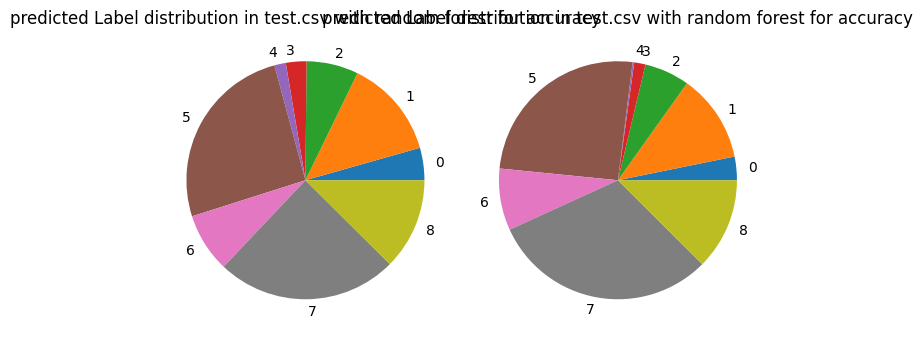

In [158]:
# non posso calcolare una confusion matrix per test.csv dato che non ho le true labels
# posso però vedere se la distribuzione delle predizioni è simile
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0]);
ax1.set_title("predicted Label distribution in test.csv with random forest for accuracy")
ax2.pie(np.unique(y_pred_f1macro, return_counts=True)[1], labels=np.unique(y_pred_f1macro, return_counts=True)[0]);
ax2.set_title("predicted Label distribution in test.csv with random forest for accuracy")

plt.tight_layout()
plt.show()